#SARIMAX

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace import sarimax
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from time import time
from datetime import timedelta
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
parser = lambda x:pd.datetime.strptime(x, '%d-%b-%y' )
df_market = pd.read_csv("Agmarknet_Price_And_Arrival_Report_LKNW_20Yrs_new.csv", parse_dates=['date_arrival'],date_parser= parser)
df_market

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,state_name,district_name,market_center_name,Variety,group_name,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),date_arrival
0,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,130.0,1620,1720,1670,2022-08-20
1,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,130.0,1640,1740,1690,2022-08-19
2,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,110.0,1640,1740,1690,2022-08-18
3,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,90.0,1640,1740,1690,2022-08-17
4,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,110.0,1610,1710,1660,2022-08-16
...,...,...,...,...,...,...,...,...,...,...
5667,Uttar Pradesh,Lucknow,Lucknow,Local,Vegetables,360.0,0,545,160,2002-08-13
5668,Uttar Pradesh,Lucknow,Lucknow,Red,Vegetables,340.0,0,540,150,2002-08-12
5669,Uttar Pradesh,Lucknow,Lucknow,Local,Vegetables,340.0,0,555,160,2002-08-12
5670,Uttar Pradesh,Lucknow,Lucknow,Red,Vegetables,340.0,0,530,150,2002-08-09


In [3]:
# ## Sorting index to ascending order of date_arrival Col
df_market= df_market.iloc[::-1]
df_market

,state_name,district_name,market_center_name,Variety,group_name,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),date_arrival
5671,Uttar Pradesh,Lucknow,Lucknow,Local,Vegetables,340.0,0,545,160,2002-08-09
5670,Uttar Pradesh,Lucknow,Lucknow,Red,Vegetables,340.0,0,530,150,2002-08-09
5669,Uttar Pradesh,Lucknow,Lucknow,Local,Vegetables,340.0,0,555,160,2002-08-12
5668,Uttar Pradesh,Lucknow,Lucknow,Red,Vegetables,340.0,0,540,150,2002-08-12
5667,Uttar Pradesh,Lucknow,Lucknow,Local,Vegetables,360.0,0,545,160,2002-08-13
...,...,...,...,...,...,...,...,...,...,...
4,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,110.0,1610,1710,1660,2022-08-16
3,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,90.0,1640,1740,1690,2022-08-17
2,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,110.0,1640,1740,1690,2022-08-18
1,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,130.0,1640,1740,1690,2022-08-19


In [4]:
df_market.describe()

,Arrival(Tonnes),MIN,MAX,MODAL(Per Q)
count,5672.000000,5672.000000,5672.000000,5672.000000
mean,147.935684,575.267278,883.482193,841.607017
std,137.014209,611.014877,519.569226,488.959581
min,3.500000,0.000000,0.000000,0.000000
25%,63.500000,0.000000,515.000000,500.000000
50%,103.000000,500.000000,745.000000,715.000000
75%,181.125000,1000.000000,1150.000000,1071.250000
max,1745.000000,3200.000000,4800.000000,4800.000000


In [5]:
df_market.value_counts('MIN'),df_market.value_counts('MAX'),df_market.value_counts('MODAL(Per Q)')

(MIN
 0       2347
 1000     293
 500      210
 800      210
 600      205
         ... 
 1580       1
 520        1
 1625       1
 1675       1
 1110       1
 Length: 182, dtype: int64, MAX
 600     282
 700     210
 1200    205
 650     203
 1100    200
        ... 
 175       1
 1590      1
 1110      1
 170       1
 4800      1
 Length: 275, dtype: int64, MODAL(Per Q)
 500     202
 400     199
 600     196
 1100    186
 700     167
        ... 
 1760      1
 1720      1
 1540      1
 1535      1
 4800      1
 Length: 324, dtype: int64)

In [6]:
df_market.isnull().sum()

state_name            0
district_name         0
market_center_name    0
Variety               0
group_name            0
Arrival(Tonnes)       0
MIN                   0
MAX                   0
MODAL(Per Q)          0
date_arrival          0
dtype: int64

In [7]:
df_market['MIN']=np.where(df_market['MIN']==0,df_market['MIN'].median(),df_market['MIN'])
df_market['MIN']

5671     500.0
5670     500.0
5669     500.0
5668     500.0
5667     500.0
         ...  
4       1610.0
3       1640.0
2       1640.0
1       1640.0
0       1620.0
Name: MIN, Length: 5672, dtype: float64

In [8]:
df_market['MAX']=np.where(df_market['MAX']==0,df_market['MAX'].median(),df_market['MAX'])
df_market['MAX']

5671     545.0
5670     530.0
5669     555.0
5668     540.0
5667     545.0
         ...  
4       1710.0
3       1740.0
2       1740.0
1       1740.0
0       1720.0
Name: MAX, Length: 5672, dtype: float64

In [9]:
parser1 = lambda x:pd.datetime.strptime(x, '%d/%m/%Y' )
df_weather = pd.read_csv("LCKNW_Prcp_Temp_20yrs.csv", parse_dates=['date_arrival'],date_parser= parser1)
df_weather

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,date_arrival,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
0,2002-08-09,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,372.0,",,S",274.0,",,S",322,"H,,S"
1,2002-08-10,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,372.0,",,S",NaN,NaN,284,"H,,S"
2,2002-08-11,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,332.0,",,S",255.0,",,S",277,"H,,S"
3,2002-08-12,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,288.0,",,S",NaN,NaN,268,"H,,S"
4,2002-08-13,26.75,80.883,128,"LUCKNOW AMAUSI, IN",249.0,",,S",320.0,",,S",246.0,",,S",268,"H,,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,2022-08-13,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,360.0,",,S",NaN,NaN,309,"H,,S"
7297,2022-08-14,26.75,80.883,128,"LUCKNOW AMAUSI, IN",150.0,",,S",360.0,",,S",265.0,",,S",301,"H,,S"
7298,2022-08-15,26.75,80.883,128,"LUCKNOW AMAUSI, IN",5.0,",,S",342.0,",,S",NaN,NaN,281,"H,,S"
7299,2022-08-16,26.75,80.883,128,"LUCKNOW AMAUSI, IN",41.0,",,S",336.0,",,S",256.0,",,S",287,"H,,S"


In [10]:
df_weather['TMAX'].isna().sum(), df_weather['TMIN'].isnull().sum()

(1744, 1484)

In [11]:
df_weather['TMIN']=np.where(df_weather['TMIN']==0,df_weather['TMIN'].mean(),df_weather['TMIN'])
df_weather['TMIN']

0       274.0
1         NaN
2       255.0
3         NaN
4       246.0
        ...  
7296      NaN
7297    265.0
7298      NaN
7299    256.0
7300      NaN
Name: TMIN, Length: 7301, dtype: float64

In [12]:
df_weather['TMIN']= df_weather['TMIN'].fillna(method='ffill')  #,inplace =True
df_weather['TMIN']

0       274.0
1       274.0
2       255.0
3       255.0
4       246.0
        ...  
7296    269.0
7297    265.0
7298    265.0
7299    256.0
7300    256.0
Name: TMIN, Length: 7301, dtype: float64

In [13]:
df_weather['TMAX']=np.where(df_weather['TMAX']==0,df_weather['TMAX'].mean(),df_weather['TMAX'])
df_weather['TMAX']

0       372.0
1       372.0
2       332.0
3       288.0
4       320.0
        ...  
7296    360.0
7297    360.0
7298    342.0
7299    336.0
7300    350.0
Name: TMAX, Length: 7301, dtype: float64

In [14]:
df_weather['TMAX']= df_weather['TMAX'].fillna(value=df_weather['TMAX'].mean()) #,inplace=True

df_weather['TMAX']

0       372.0
1       372.0
2       332.0
3       288.0
4       320.0
        ...  
7296    360.0
7297    360.0
7298    342.0
7299    336.0
7300    350.0
Name: TMAX, Length: 7301, dtype: float64

In [15]:
df_weather['TMAX'].isna().sum(), df_weather['TMIN'].isna().sum()

(0, 0)

In [16]:
## precipitation: fillna() with 0
df_weather['PRCP'].fillna(0,axis=0,inplace=True)
df_weather

,date_arrival,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
0,2002-08-09,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,372.0,",,S",274.0,",,S",322,"H,,S"
1,2002-08-10,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,372.0,",,S",274.0,NaN,284,"H,,S"
2,2002-08-11,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,332.0,",,S",255.0,",,S",277,"H,,S"
3,2002-08-12,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,288.0,",,S",255.0,NaN,268,"H,,S"
4,2002-08-13,26.75,80.883,128,"LUCKNOW AMAUSI, IN",249.0,",,S",320.0,",,S",246.0,",,S",268,"H,,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,2022-08-13,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,360.0,",,S",269.0,NaN,309,"H,,S"
7297,2022-08-14,26.75,80.883,128,"LUCKNOW AMAUSI, IN",150.0,",,S",360.0,",,S",265.0,",,S",301,"H,,S"
7298,2022-08-15,26.75,80.883,128,"LUCKNOW AMAUSI, IN",5.0,",,S",342.0,",,S",265.0,NaN,281,"H,,S"
7299,2022-08-16,26.75,80.883,128,"LUCKNOW AMAUSI, IN",41.0,",,S",336.0,",,S",256.0,",,S",287,"H,,S"


In [17]:
# Should drop repetitive cols datapoints that are not required but will keep in Dataset where I 
# have data from multiple State and Markets

df_market.drop(columns=['state_name','district_name','market_center_name','group_name'],axis=1,  inplace=True)
df_market

,Variety,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),date_arrival
5671,Local,340.0,500.0,545.0,160,2002-08-09
5670,Red,340.0,500.0,530.0,150,2002-08-09
5669,Local,340.0,500.0,555.0,160,2002-08-12
5668,Red,340.0,500.0,540.0,150,2002-08-12
5667,Local,360.0,500.0,545.0,160,2002-08-13
...,...,...,...,...,...,...
4,Desi,110.0,1610.0,1710.0,1660,2022-08-16
3,Desi,90.0,1640.0,1740.0,1690,2022-08-17
2,Desi,110.0,1640.0,1740.0,1690,2022-08-18
1,Desi,130.0,1640.0,1740.0,1690,2022-08-19


In [18]:
df_weather.drop(columns=['LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME',
       'PRCP_ATTRIBUTES', 'TMAX_ATTRIBUTES','TMIN_ATTRIBUTES',
       'TAVG_ATTRIBUTES'],axis=1,  inplace=True)
df_weather

,date_arrival,PRCP,TMAX,TMIN,TAVG
0,2002-08-09,0.0,372.0,274.0,322
1,2002-08-10,0.0,372.0,274.0,284
2,2002-08-11,0.0,332.0,255.0,277
3,2002-08-12,0.0,288.0,255.0,268
4,2002-08-13,249.0,320.0,246.0,268
...,...,...,...,...,...
7296,2022-08-13,0.0,360.0,269.0,309
7297,2022-08-14,150.0,360.0,265.0,301
7298,2022-08-15,5.0,342.0,265.0,281
7299,2022-08-16,41.0,336.0,256.0,287


In [19]:
# Merging both dataframes according to df1 col date_arrival
# Left Join

df_merge = pd.merge(df_market, df_weather, on= 'date_arrival')
df_merge

,Variety,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),date_arrival,PRCP,TMAX,TMIN,TAVG
0,Local,340.0,500.0,545.0,160,2002-08-09,0.0,372.0,274.0,322
1,Red,340.0,500.0,530.0,150,2002-08-09,0.0,372.0,274.0,322
2,Local,340.0,500.0,555.0,160,2002-08-12,0.0,288.0,255.0,268
3,Red,340.0,500.0,540.0,150,2002-08-12,0.0,288.0,255.0,268
4,Local,360.0,500.0,545.0,160,2002-08-13,249.0,320.0,246.0,268
...,...,...,...,...,...,...,...,...,...,...
5655,Desi,110.0,1620.0,1730.0,1670,2022-08-12,0.0,340.0,269.0,293
5656,Desi,100.0,1610.0,1710.0,1660,2022-08-13,0.0,360.0,269.0,309
5657,Desi,70.0,1610.0,1710.0,1660,2022-08-14,150.0,360.0,265.0,301
5658,Desi,110.0,1610.0,1710.0,1660,2022-08-16,41.0,336.0,256.0,287


In [20]:
df_merge.isna().sum(), df_merge.isnull().sum()

(Variety            0
 Arrival(Tonnes)    0
 MIN                0
 MAX                0
 MODAL(Per Q)       0
 date_arrival       0
 PRCP               0
 TMAX               0
 TMIN               0
 TAVG               0
 dtype: int64, Variety            0
 Arrival(Tonnes)    0
 MIN                0
 MAX                0
 MODAL(Per Q)       0
 date_arrival       0
 PRCP               0
 TMAX               0
 TMIN               0
 TAVG               0
 dtype: int64)

In [21]:
df_merge.corr(method='pearson')

,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG
Arrival(Tonnes),1.000000,-0.040156,-0.065415,-0.087633,-0.055427,-0.257852,-0.332064,-0.308101
MIN,-0.040156,1.000000,0.936636,0.934336,0.041958,0.087153,0.194229,0.164760
MAX,-0.065415,0.936636,1.000000,0.995024,0.046484,0.118719,0.240000,0.202191
MODAL(Per Q),-0.087633,0.934336,0.995024,1.000000,0.044672,0.128168,0.247920,0.209461
PRCP,-0.055427,0.041958,0.046484,0.044672,1.000000,0.002527,0.118661,0.051706
TMAX,-0.257852,0.087153,0.118719,0.128168,0.002527,1.000000,0.730081,0.812158
TMIN,-0.332064,0.194229,0.240000,0.247920,0.118661,0.730081,1.000000,0.933325
TAVG,-0.308101,0.164760,0.202191,0.209461,0.051706,0.812158,0.933325,1.000000


In [22]:
df_merge.set_index(['date_arrival'])

,Variety,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG
date_arrival,,,,,,,,,
2002-08-09,Local,340.0,500.0,545.0,160,0.0,372.0,274.0,322
2002-08-09,Red,340.0,500.0,530.0,150,0.0,372.0,274.0,322
2002-08-12,Local,340.0,500.0,555.0,160,0.0,288.0,255.0,268
2002-08-12,Red,340.0,500.0,540.0,150,0.0,288.0,255.0,268
2002-08-13,Local,360.0,500.0,545.0,160,249.0,320.0,246.0,268
...,...,...,...,...,...,...,...,...,...
2022-08-12,Desi,110.0,1620.0,1730.0,1670,0.0,340.0,269.0,293
2022-08-13,Desi,100.0,1610.0,1710.0,1660,0.0,360.0,269.0,309
2022-08-14,Desi,70.0,1610.0,1710.0,1660,150.0,360.0,265.0,301


In [23]:
df_input = df_merge[['date_arrival','MODAL(Per Q)','MAX','TAVG','Arrival(Tonnes)','PRCP','Variety']]
df_input.drop_duplicates(subset='date_arrival', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [24]:
df_input

,date_arrival,MODAL(Per Q),MAX,TAVG,Arrival(Tonnes),PRCP,Variety
0,2002-08-09,160,545.0,322,340.0,0.0,Local
2,2002-08-12,160,555.0,268,340.0,0.0,Local
4,2002-08-13,160,545.0,268,360.0,249.0,Local
6,2002-08-14,160,540.0,284,390.0,239.0,Local
8,2002-08-16,160,540.0,312,240.0,0.0,Local
...,...,...,...,...,...,...,...
5655,2022-08-12,1670,1730.0,293,110.0,0.0,Desi
5656,2022-08-13,1660,1710.0,309,100.0,0.0,Desi
5657,2022-08-14,1660,1710.0,301,70.0,150.0,Desi
5658,2022-08-16,1660,1710.0,287,110.0,41.0,Desi


In [25]:
df_input['Variety'].value_counts() > 50  

Desi             True
Potato           True
Other            True
Red              True
Local           False
Chandermukhi    False
Name: Variety, dtype: bool

In [26]:
variety = ['Desi','Potato','Other','Red','Chandermukhi']
df_input_ = df_input.copy().loc[df_input['Variety'].isin(variety)]
df_input_

,date_arrival,MODAL(Per Q),MAX,TAVG,Arrival(Tonnes),PRCP,Variety
14,2003-01-23,170,170.0,127,230.0,0.0,Red
16,2003-01-24,160,160.0,171,170.0,0.0,Red
18,2003-01-25,160,160.0,148,190.0,0.0,Red
20,2003-01-27,160,160.0,198,130.0,0.0,Red
22,2003-01-28,160,160.0,178,120.0,30.0,Red
...,...,...,...,...,...,...,...
5655,2022-08-12,1670,1730.0,293,110.0,0.0,Desi
5656,2022-08-13,1660,1710.0,309,100.0,0.0,Desi
5657,2022-08-14,1660,1710.0,301,70.0,150.0,Desi
5658,2022-08-16,1660,1710.0,287,110.0,41.0,Desi


In [27]:
df_input_.set_index(['date_arrival'],inplace= True)

In [28]:
df_input_.index

DatetimeIndex(['2003-01-23', '2003-01-24', '2003-01-25', '2003-01-27',
               '2003-01-28', '2003-01-29', '2003-01-30', '2003-01-31',
               '2003-03-06', '2003-03-08',
               ...
               '2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09',
               '2022-08-10', '2022-08-12', '2022-08-13', '2022-08-14',
               '2022-08-16', '2022-08-17'],
              dtype='datetime64[ns]', name='date_arrival', length=5179, freq=None)

In [29]:
#df.set_index('')[['MIN','MAX','MODAL']].plot(subplots=True)

In [30]:
df_train_to_val =df_input_[:-30].copy()
df_validate= df_input_[-30:].copy()

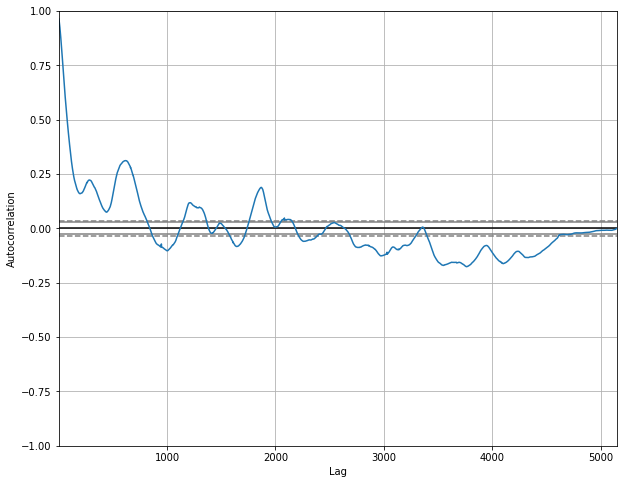

In [31]:
##Autocorrelation plot to check pattern or it's random

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_train_to_val['MODAL(Per Q)'])

## In autocorrelation plot the blue line hovers inside the confidence interval then it's random data points 
## meaning modelling on top of it won't be possible

In [32]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df_train_to_val['MODAL(Per Q)'])

1. ADF :  -4.013805607750201
2. P-Value :  0.0013399215148548595
3. Num Of Lags :  18
4. Num Of Observations Used For ADF Regression: 5130
5. Critical Values :
	 1% :  -3.4316253557783787
	 5% :  -2.862103572487834
	 10% :  -2.5670699897784313


## P-Value :  0.0015923172081970783
Pvalue is lower so we donot have to perform differentitaion

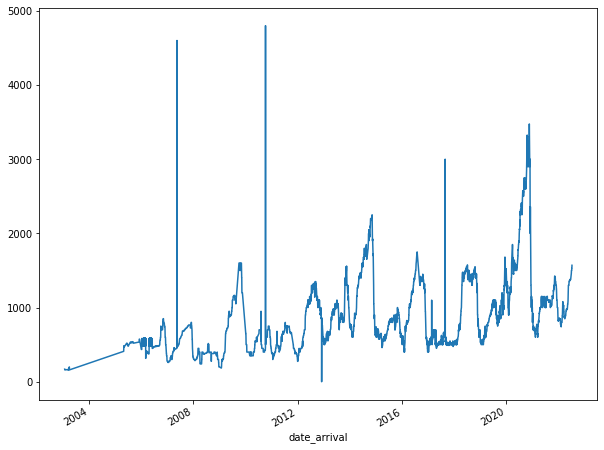

In [33]:
df_train_to_val['MODAL(Per Q)'].plot()

##If we have to perform the differentitaion

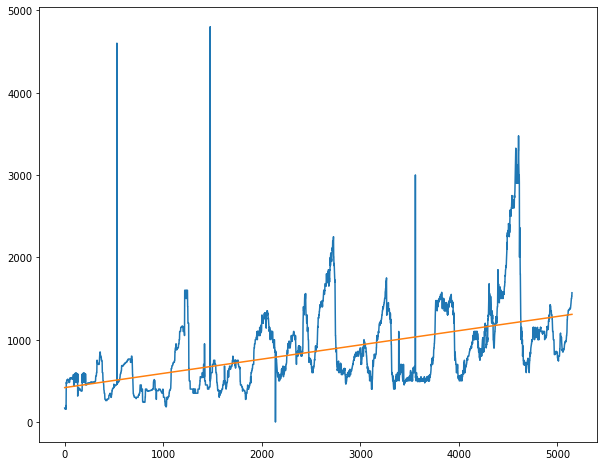

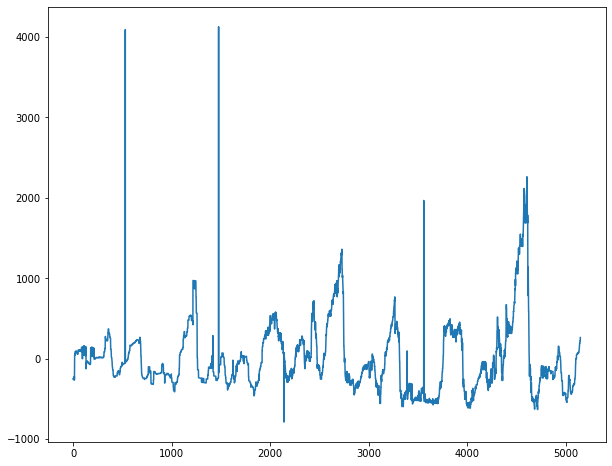

In [34]:
from sklearn.linear_model import LinearRegression
X = [i for i in range(0, len(df_train_to_val))]
X = np.reshape(X, (len(X), 1))
y = df_train_to_val['MODAL(Per Q)'].values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(df_train_to_val))]
# plot detrended
plt.plot(detrended)
plt.show()

In [35]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_train_to_val['MODAL(Per Q)'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=63165.210, Time=7.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=65063.522, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=63797.252, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=63210.927, Time=2.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=65061.543, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=63163.461, Time=8.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=63206.228, Time=2.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=63206.760, Time=4.02 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=63165.219, Time=5.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=63203.675, Time=1.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=63205.497, Time=2.96 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=63167.017, Time=5.35 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=63161.581, Time=1.64 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=63204.437, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
stepwise_fit_sarimax = SARIMAX(df_train_to_val['MODAL(Per Q)'], order= (1, 1, 2),seasonal_order= (1,1,1,4), exog= df_train_to_val['TAVG'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5149
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -31576.791
Date:                Wed, 21 Sep 2022   AIC                          63161.581
Time:                        20:33:03   BIC                          63187.767
Sample:                             0   HQIC                         63170.745
                               - 5149                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9287      0.027     34.567      0.000       0.876       0.981
ma.L1         -1.6012      0.027    -59.735      0.000      -1.654      -1.549
ma.L2          0.6397      0.017     36.932      0.000       0.606       0.674
sigma2      1.245e+04     11.833   1052.238      0.000    1.24e+04    1.25e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):         163463974.60
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            21.91
Prob(H) (two-sided):                  0.00   Kurtosis:                       874.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


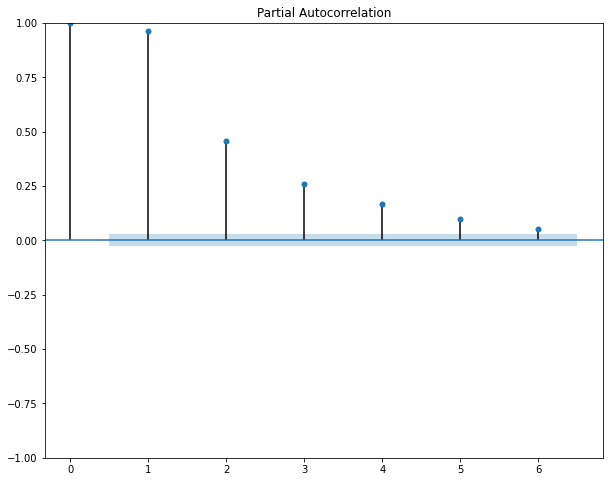

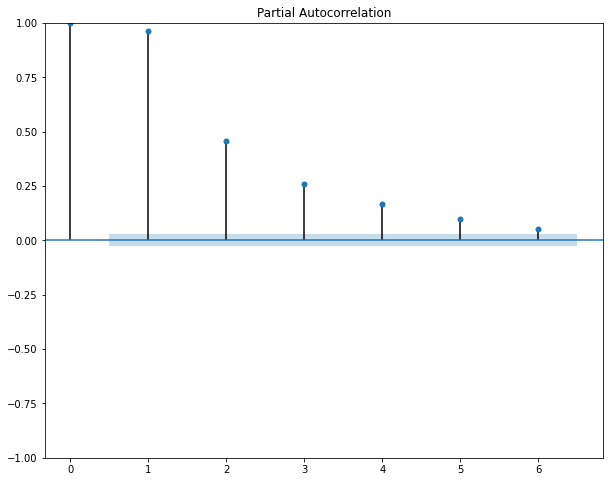

In [39]:
##Partial Auto corelation

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_train_to_val['MODAL(Per Q)'], lags = 6)

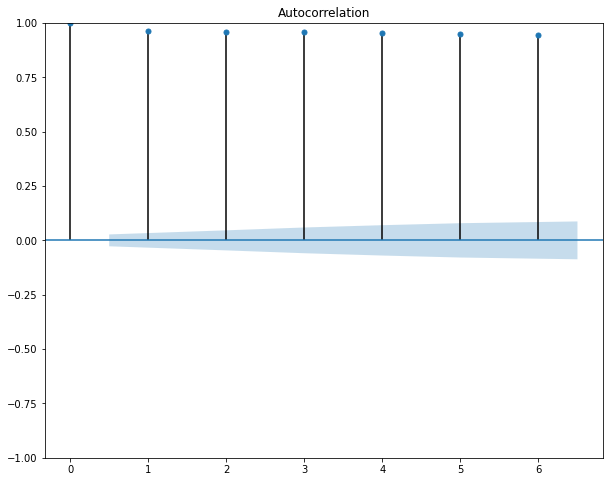

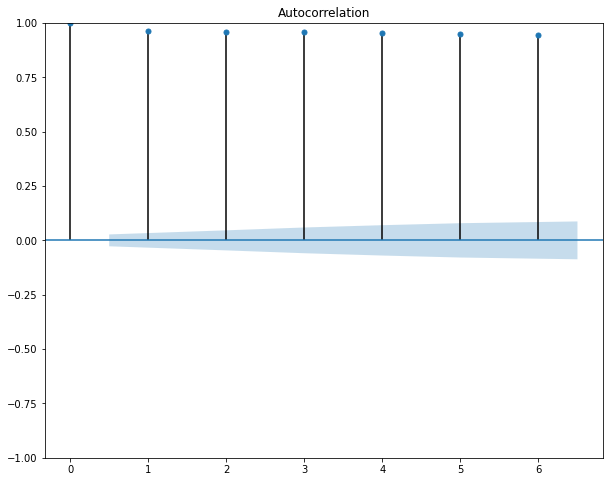

In [40]:
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(df_train_to_val['MODAL(Per Q)'], lags = 6)

In [41]:
train_dates = df_train_to_val.index

In [42]:
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods= 30,  freq= '1d' )

In [43]:
train_dates

DatetimeIndex(['2003-01-23', '2003-01-24', '2003-01-25', '2003-01-27',
               '2003-01-28', '2003-01-29', '2003-01-30', '2003-01-31',
               '2003-03-06', '2003-03-08',
               ...
               '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08',
               '2022-07-09', '2022-07-11', '2022-07-12', '2022-07-13',
               '2022-07-14', '2022-07-15'],
              dtype='datetime64[ns]', name='date_arrival', length=5149, freq=None)

In [44]:
forecast_period_dates

DatetimeIndex(['2022-07-15', '2022-07-16', '2022-07-17', '2022-07-18',
               '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22',
               '2022-07-23', '2022-07-24', '2022-07-25', '2022-07-26',
               '2022-07-27', '2022-07-28', '2022-07-29', '2022-07-30',
               '2022-07-31', '2022-08-01', '2022-08-02', '2022-08-03',
               '2022-08-04', '2022-08-05', '2022-08-06', '2022-08-07',
               '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11',
               '2022-08-12', '2022-08-13'],
              dtype='datetime64[ns]', freq='D')

In [45]:
forecast_period_dates[-1]

Timestamp('2022-08-13 00:00:00', freq='D')

In [46]:
train_dates[-1]

Timestamp('2022-07-15 00:00:00')

In [47]:
df_validate

,MODAL(Per Q),MAX,TAVG,Arrival(Tonnes),PRCP,Variety
date_arrival,,,,,,
2022-07-16,1590,1640.0,308,100.0,0.0,Desi
2022-07-17,1580,1630.0,335,170.0,0.0,Desi
2022-07-18,1580,1630.0,333,120.0,0.0,Desi
2022-07-19,1580,1630.0,332,130.0,0.0,Desi
2022-07-20,1580,1630.0,276,120.0,0.0,Desi
2022-07-21,1590,1640.0,273,120.0,0.0,Desi
2022-07-22,1600,1650.0,282,110.0,0.0,Desi
2022-07-23,1610,1660.0,302,130.0,119.0,Desi
2022-07-24,1600,1650.0,299,110.0,20.0,Desi


In [51]:
pred = stepwise_fit.predict(30)
print(pred)
#pred_sari = stepwise_fit_sarimax.predict(15)
# df_validate['predict'] = pred
pred = pd.DataFrame({'prediction': pred})
pred['date'] = forecast_period_dates

5149    1545.105676
5150    1549.060396
5151    1552.733317
5152    1556.144520
5153    1559.312653
5154    1562.255038
5155    1564.987758
5156    1567.525756
5157    1569.882905
5158    1572.072093
5159    1574.105288
5160    1575.993604
5161    1577.747367
5162    1579.376163
5163    1580.888897
5164    1582.293839
5165    1583.598670
5166    1584.810524
5167    1585.936026
5168    1586.981329
5169    1587.952147
5170    1588.853789
5171    1589.691183
5172    1590.468908
5173    1591.191214
5174    1591.862052
5175    1592.485089
5176    1593.063730
5177    1593.601140
5178    1594.100255
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [52]:
df_validate

,MODAL(Per Q),MAX,TAVG,Arrival(Tonnes),PRCP,Variety
date_arrival,,,,,,
2022-07-16,1590,1640.0,308,100.0,0.0,Desi
2022-07-17,1580,1630.0,335,170.0,0.0,Desi
2022-07-18,1580,1630.0,333,120.0,0.0,Desi
2022-07-19,1580,1630.0,332,130.0,0.0,Desi
2022-07-20,1580,1630.0,276,120.0,0.0,Desi
2022-07-21,1590,1640.0,273,120.0,0.0,Desi
2022-07-22,1600,1650.0,282,110.0,0.0,Desi
2022-07-23,1610,1660.0,302,130.0,119.0,Desi
2022-07-24,1600,1650.0,299,110.0,20.0,Desi


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


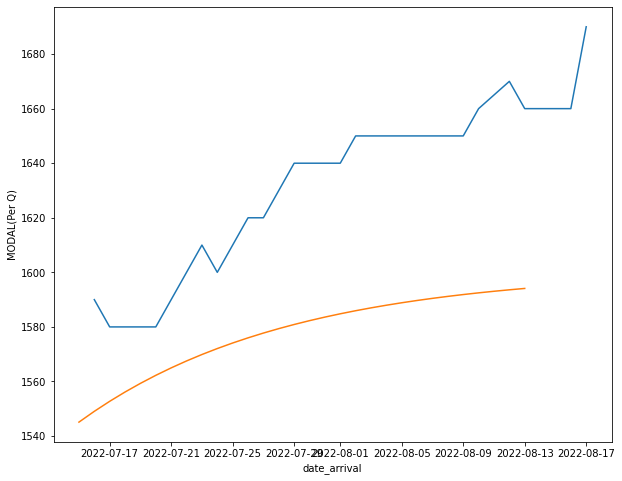

In [53]:
import seaborn as sns
sns.lineplot(df_validate.index, df_validate['MODAL(Per Q)'])
sns.lineplot(pred['date'], pred['prediction'])


In [54]:
# rmse,mape,r2,accuracy

import math

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,median_absolute_error,explained_variance_score
mpe = mean_absolute_percentage_error(df_validate['MODAL(Per Q)'] , pred['prediction'])
rmse = math.sqrt(mean_squared_error(df_validate['MODAL(Per Q)'] , pred['prediction']))
mae = median_absolute_error(df_validate['MODAL(Per Q)'] , pred['prediction'])
evs =explained_variance_score(df_validate['MODAL(Per Q)'] , pred['prediction'])

print('The MPE is {}'.format(mpe))

print('The RSME is {}'.format(rmse))
print('The MAE is {}'.format(mae))
print('The EVS is {}'.format(evs))



## checking r2

from sklearn.metrics import r2_score
r2_score = r2_score(df_validate['MODAL(Per Q)'] , pred['prediction'])
print('The r2 score is {}' .format(r2_score) )

The MPE is 0.032238438277699316
The RSME is 55.71351768101234
The MAE is 59.32109795476424
The EVS is 0.6719773750366119
The r2 score is -2.2908427932067696
